# Import and initial setup

In [939]:
# Import Necessary Libaraies
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initial configuration
raw_data_path = './Data/apartments_for_rent_classified_100K.csv'
sns.set_style('darkgrid')

In [940]:
# Determine what encoding has been used
with open(raw_data_path, 'rb') as file:
    result = chardet.detect(file.read(100000))
    file_encoding = result['encoding']
file_encoding

'Windows-1252'

In [941]:
# Import Data
raw_data = pd.read_csv(raw_data_path, encoding=file_encoding, sep=';', low_memory=False)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [942]:
raw_data.tail(50)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
99442,5121236065,housing/rent/apartment,Warner Robins - superb Apartment nearby fine d...,Come home to Southland Station Apartments - wh...,NaN,2.0,2.0,USD,No,Yes,...,$930,Monthly,1162,NaN,Warner Robins,GA,32.5958,-83.6385,RentDigs.com,1544186901
99443,5121234457,housing/rent/apartment,One BR Apartment - Large & Bright,"Square footage: 722 sq-ft, unit number: 3303. ...","Fireplace,Patio/Deck,Pool,Storage,TV,Washer Dryer",1.0,1.0,USD,No,Yes,...,"$1,290",Monthly,722,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1544186802
99444,5121234241,housing/rent/apartment,The Becker Building is located in the heart of...,Square footage: 950 sq-ft This luxurious build...,"Gym,Washer Dryer",2.0,2.0,USD,No,Yes,...,"$1,750",Monthly,950,NaN,Philadelphia,PA,39.9643,-75.1486,RentDigs.com,1544186789
99445,5121233930,housing/rent/apartment,One Spacious BR in Jacksonville,"Square footage: 781 sq. feet, unit number: 340...","Gym,Pool",1.0,1.0,USD,No,Yes,...,"$1,240",Monthly,781,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1544186765
99446,5121233841,housing/rent/apartment,"Great Central Location Two BR, Two BA","Square footage: 1323 square ft, unit number: 1...",NaN,2.0,2.0,USD,No,Yes,...,"$1,256",Monthly,1323,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1544186758
99447,5121233827,housing/rent/apartment,Huge 1 & Two BR apartments.,Heat included! Onsite management and maintenan...,Storage,1.0,1.0,USD,No,Yes,...,$605,Monthly,533,NaN,Milwaukee,WI,43.0469,-87.9667,RentDigs.com,1544186757
99448,5121233448,housing/rent/apartment,"Amazing Two BR, Two BA for rent","Square footage: 1286 square ft, unit number: 0...","Alarm,Patio/Deck,Pool",2.0,2.0,USD,No,Yes,...,"$1,438",Monthly,1286,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1544186730
99449,5121232476,housing/rent/apartment,Brand new construction. Washer/Dryer Hookups!,Be the 1st one to live in this beautiful 2 bed...,"AC,Patio/Deck,Washer Dryer,Wood Floors",1.0,2.0,USD,No,Yes,...,"$2,200",Monthly,800,NaN,Boston,MA,42.3280,-71.0710,RentDigs.com,1544186668
99450,5121232299,housing/rent/apartment,Jacksonville Luxurious 2 + 2,"Square footage: 1601 square feet, unit number:...","AC,Clubhouse,Dishwasher,Gated,Gym,Parking,Pati...",2.0,2.0,USD,No,Yes,...,"$1,537",Monthly,1601,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1544186657
99451,5121232125,housing/rent/apartment,"Move-in condition, Two BR Two BA","Square footage: 1082 square ft, unit number: 2...","Fireplace,Patio/Deck,Pool,Storage,TV,Washer Dryer",2.0,2.0,USD,No,Yes,...,"$1,760",Monthly,1082,NaN,Jacksonville,FL,30.3034,-81.5127,RentDigs.com,1544186647


In [943]:
raw_data.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


# Initial Data Cleaning

## Looking for missing values

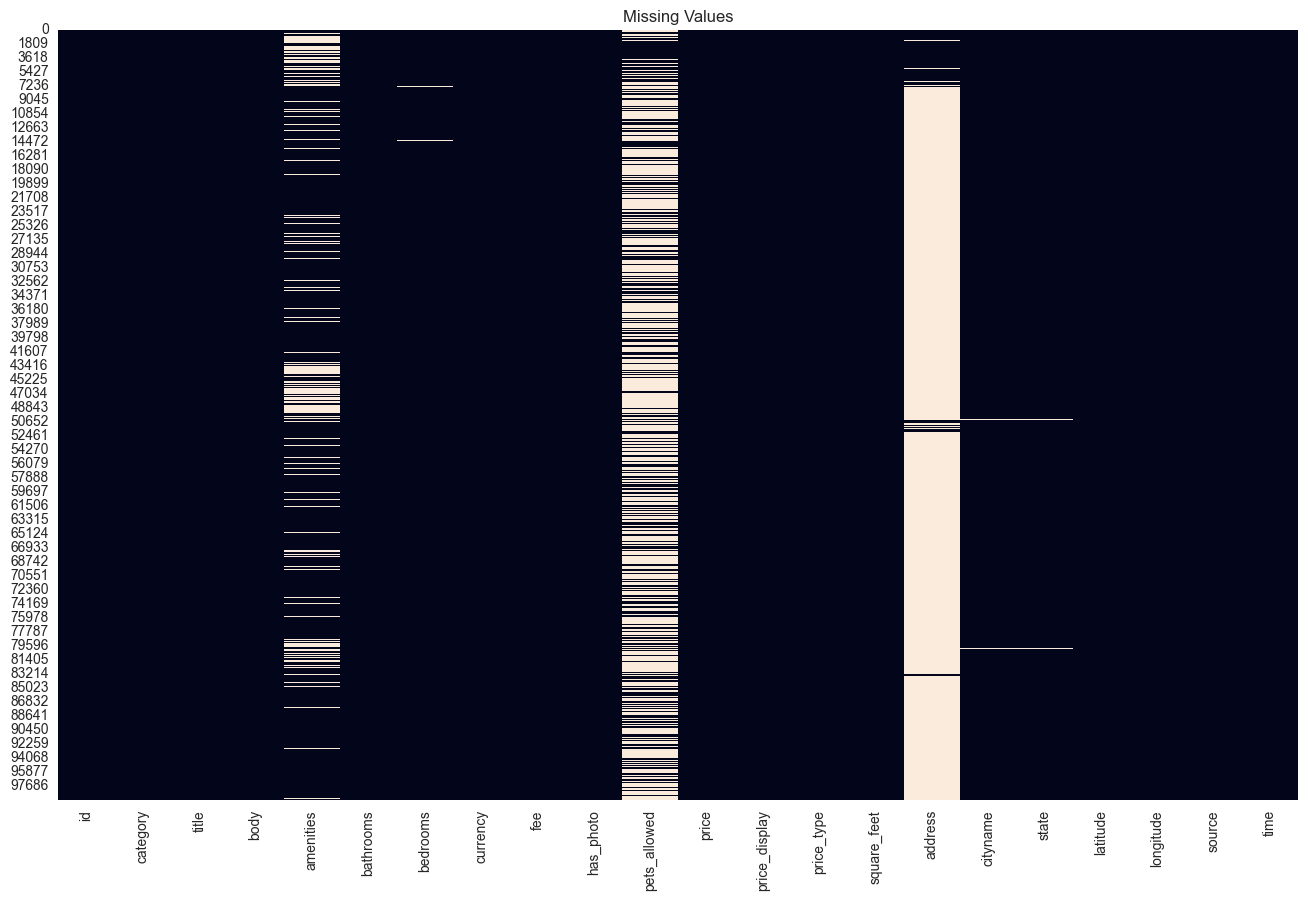

In [944]:
plt.figure(figsize=(16,10))
sns.heatmap(raw_data.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

Ved at se på grafen her over kan man konkludere at det ikke vil være gavnligt medtage kolonnen 'address' grundet den store mængde manglende data.
Der opstår her et problem i kolonnen 'pets_allowed' samt 'amenities' da Pandas biblioteket læser værdien 'None','null' og 'NaN', jeg tolker disse som ingen dyr tilladt og ingen amenities.

In [945]:
print(f"Procentage of rows lacking the amenities value:  {(len(raw_data.loc[raw_data['amenities'].isnull()])/len(raw_data))*100}")
print(f"Procentage of rows lacking the pets_allowed value:  {(len(raw_data.loc[raw_data['pets_allowed'].isnull()])/len(raw_data))*100}")
print(f"Procentage of rows lacking the address value:  {(len(raw_data.loc[raw_data['address'].isnull()])/len(raw_data))*100}")

Procentage of rows lacking the amenities value:  16.125919671933424
Procentage of rows lacking the pets_allowed value:  60.73252120773529
Procentage of rows lacking the address value:  92.01644353314839


In [946]:
# Remove columns with alot of missing values
data = raw_data.drop(['address'], axis=1, inplace=False)

Looking for missing values in bedrooms, bathrooms and price

In [947]:
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [948]:
data.dropna(subset=['bedrooms', 'bathrooms', 'price'], inplace=True)
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        15974
bathrooms            0
bedrooms             0
currency             0
fee                  0
has_photo            0
pets_allowed     60283
price                0
price_display        0
price_type           0
square_feet          0
cityname           298
state              298
latitude            25
longitude           25
source               0
time                 0
dtype: int64

## Looking for other unnessesary values

In [949]:
# Checking if all rows use usd
print(f"Amount of rows where currency is not usd: {len(raw_data.loc[raw_data['currency'] != 'USD'])}")
print(f"Amount of rowd where 'price_type' is not monthly: {len(raw_data.loc[raw_data['price_type'] != 'Monthly'])}")
print(f"Amount of rows where 'fee' is not 'No': {len(raw_data.loc[raw_data['fee'] != 'No'])}")
print(f"Amount of rows where 'category' is not 'housing/rent/apartment': {len(raw_data.loc[raw_data['category'] != 'housing/rent/apartment'])}")


Amount of rows where currency is not usd: 0
Amount of rowd where 'price_type' is not monthly: 4
Amount of rows where 'fee' is not 'No': 201
Amount of rows where 'category' is not 'housing/rent/apartment': 61


Fordi alle rækkerne benytter USD i 'currency' kolonnen, er den kolonne ikke nødvendig. kolonnen  'Price_Display' er heller ikke nødvendig da den blot formaterer prisen i forhold til 'currency' og prisen ligger for sig selv i kolonnen 'price'
'title' kolonnen er en ustruktureret beskrivelse af lejemålet, og jeg vurdere ikke denne som relevant for den vidre analyse. Det samme er gældende for 'source' kolonnen, 'time' kolonnen og 'body' kolonnen

In [950]:
data.drop(['price_display','currency', 'title', 'source', 'time', 'body', 'id', 'fee', 'latitude', 'longitude'], axis=1, inplace=True)

### The Category value

In [951]:
data['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

Som vist højre oppe er der blot 61 rækker, hvor der er tale om en anden type end "housing/rent/apartment" De andre kategorier er:
- 'housing/rent/home'
- 'housing/rent/short_term'
- 'housing/rent'
- 'housing/rent/condo'
- 'housing/rent/other'
- 'housing/rent/commercial/retail'

For at forenkle dataen vurderer jeg, grundet den meget begrænset variation af data, kan jeg først fjerne rækker, hvor kategorien ikke er 'housing/rent/apartment' derefter fjerner jeg kolonnen 'category'
Det samme gør sig gældende for kolonnen 'price_type', her er der blot 4 rækker hvor værdien ikke er 'monthly'.

In [952]:
data.drop(data[data['category'] != 'housing/rent/apartment'].index, inplace=True)
data.drop(data[data['price_type'] != 'Monthly'].index, inplace=True)
data.drop(['category','price_type'], axis=1, inplace=True)
data


,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,NaN,1.0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
1,NaN,1.5,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA
2,NaN,2.0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC
3,NaN,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
4,NaN,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,Yes,NaN,780.0,605,Houston,TX
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL
99489,"Garbage Disposal,Refrigerator",1.0,1.0,Yes,"Cats,Dogs",1325.0,650,San Diego,CA
99490,"Gym,Pool",1.0,1.0,Yes,"Cats,Dogs",931.0,701,Huntersville,NC


### The Amenities Values

Først finder jeg alle typer af amenities der opstår i datasettet 

In [953]:
# Find individual amenities
amenlist = list(data['amenities'])
arr_amenities = []
# Replace null values
for i in amenlist:
    if type(i) == float:
        arr_amenities.append("No Ammenities")
    else:
        arr_amenities.extend(i.split(","))
amenlist = list(arr_amenities)
print(set(amenlist))

{'Elevator', 'Luxury', 'Doorman', 'Storage', 'Tennis', 'Playground', 'Wood Floors', 'Golf', 'Pool', 'TV', 'No Ammenities', 'Garbage Disposal', 'Gated', 'AC', 'Hot Tub', 'Cable or Satellite', 'View', 'Basketball', 'Dishwasher', 'Clubhouse', 'Fireplace', 'Washer Dryer', 'Alarm', 'Gym', 'Patio/Deck', 'Parking', 'Refrigerator', 'Internet Access'}


Her ændre jeg alle alle tomme værdier, som jeg tolker som om der ikke er nogen amenities, til teksten "No Amenities"

In [954]:
data.loc[data['amenities'].isnull(), 'amenities'] = "No Amenities"

In [955]:
data

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,No Amenities,1.0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
1,No Amenities,1.5,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA
2,No Amenities,2.0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC
3,No Amenities,1.0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
4,No Amenities,1.0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,Yes,NaN,780.0,605,Houston,TX
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL
99489,"Garbage Disposal,Refrigerator",1.0,1.0,Yes,"Cats,Dogs",1325.0,650,San Diego,CA
99490,"Gym,Pool",1.0,1.0,Yes,"Cats,Dogs",931.0,701,Huntersville,NC


Jeg opretter en colonne for hver type af amenity, og udfylder med 0 til start

In [956]:
# Adding columns to data
for i in set(amenlist):
    data.insert(2,i,0)

In [957]:
data

,amenities,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,...,Doorman,Luxury,Elevator,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,No Amenities,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Thumbnail,Cats,2195.0,542,Redondo Beach,CA
1,No Amenities,1.5,0,0,0,0,0,0,0,0,...,0,0,0,3.0,Thumbnail,"Cats,Dogs",1250.0,1500,Newport News,VA
2,No Amenities,2.0,0,0,0,0,0,0,0,0,...,0,0,0,3.0,Thumbnail,NaN,1395.0,1650,Raleigh,NC
3,No Amenities,1.0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,Thumbnail,"Cats,Dogs",1600.0,820,Vacaville,CA
4,No Amenities,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Thumbnail,"Cats,Dogs",975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,"Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Yes,NaN,780.0,605,Houston,TX
99488,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,Yes,"Cats,Dogs",813.0,921,Jacksonville,FL
99489,"Garbage Disposal,Refrigerator",1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Yes,"Cats,Dogs",1325.0,650,San Diego,CA
99490,"Gym,Pool",1.0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,Yes,"Cats,Dogs",931.0,701,Huntersville,NC


Efter benytter jeg en lambda funktion der deler teksten i 'amenities' op i de enekte elementerm, og opdaterer den korrekte kolonne

In [958]:
for i in set(amenlist):
     data[i] = data['amenities'].apply(lambda x: 1 if i in x.split(',') else 0)
data.columns

Index(['amenities', 'bathrooms', 'Internet Access', 'Refrigerator', 'Parking',
       'Patio/Deck', 'Gym', 'Alarm', 'Washer Dryer', 'Fireplace', 'Clubhouse',
       'Dishwasher', 'Basketball', 'View', 'Cable or Satellite', 'Hot Tub',
       'AC', 'Gated', 'Garbage Disposal', 'No Ammenities', 'TV', 'Pool',
       'Golf', 'Wood Floors', 'Playground', 'Tennis', 'Storage', 'Doorman',
       'Luxury', 'Elevator', 'bedrooms', 'has_photo', 'pets_allowed', 'price',
       'square_feet', 'cityname', 'state'],
      dtype='object')

Nu kan kolonnen amenities fjernes

In [959]:
data.drop(['amenities', 'No Ammenities'], axis=1, inplace=True)

In [960]:
data.columns

Index(['bathrooms', 'Internet Access', 'Refrigerator', 'Parking', 'Patio/Deck',
       'Gym', 'Alarm', 'Washer Dryer', 'Fireplace', 'Clubhouse', 'Dishwasher',
       'Basketball', 'View', 'Cable or Satellite', 'Hot Tub', 'AC', 'Gated',
       'Garbage Disposal', 'TV', 'Pool', 'Golf', 'Wood Floors', 'Playground',
       'Tennis', 'Storage', 'Doorman', 'Luxury', 'Elevator', 'bedrooms',
       'has_photo', 'pets_allowed', 'price', 'square_feet', 'cityname',
       'state'],
      dtype='object')

In [961]:
data.loc[data['Luxury'] == 1]

,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,Clubhouse,...,Doorman,Luxury,Elevator,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
45,1.0,1,1,1,1,0,0,0,1,0,...,0,1,1,1.0,Thumbnail,"Cats,Dogs",1025.0,616,Windsor,WI
2116,1.0,0,0,0,0,0,0,0,0,0,...,0,1,0,2.0,Thumbnail,"Cats,Dogs",1688.0,448,Austin,TX
4812,1.0,1,1,1,1,0,0,0,0,1,...,0,1,0,1.0,Thumbnail,"Cats,Dogs",1425.0,973,Ruskin,FL
5066,2.0,0,1,1,0,0,0,0,0,0,...,0,1,0,4.0,Thumbnail,"Cats,Dogs",2995.0,1560,Madison,WI
5381,1.0,1,1,1,1,0,0,0,0,0,...,0,1,1,3.0,Thumbnail,"Cats,Dogs",1365.0,802,Madison,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97785,2.0,0,0,0,0,0,0,0,0,0,...,0,1,0,2.0,Yes,"Cats,Dogs",2560.0,1110,Irvine,CA
97896,1.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.0,Yes,NaN,750.0,500,Tallahassee,FL
97947,1.5,0,0,0,0,0,0,0,0,0,...,0,1,0,2.0,Yes,"Cats,Dogs",806.0,1060,Jacksonville,FL
98384,2.0,0,0,0,0,0,0,0,0,0,...,0,1,0,3.0,Yes,NaN,1550.0,2088,San Antonio,TX


### pets allowed value

In [962]:
data['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Cats,Dogs,None'], dtype=object)

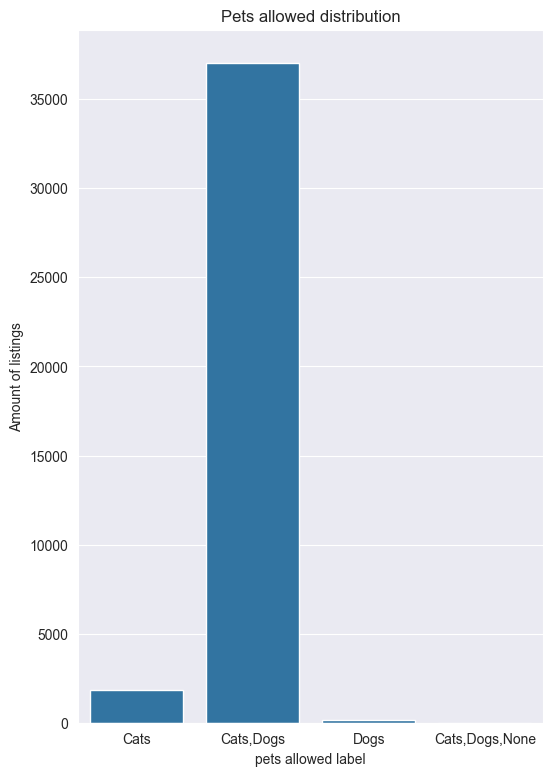

In [963]:
plt.figure(figsize=(6,9))
sns.countplot(data, x='pets_allowed')
plt.xlabel("pets allowed label")
plt.ylabel("Amount of listings")
plt.title("Pets allowed distribution")
plt.show()

In [964]:
print(f"procentage of pets not allowed {len(data.loc[data['pets_allowed'].isnull()])/(len(data))*100}")
print(f"procentage of Cats, Dogs {len(data.loc[data['pets_allowed']=='Cats,Dogs'])/(len(data))*100}")
print(f"procentage of Cats {len(data.loc[data['pets_allowed']=='Cats'])/(len(data))*100}")
print(f"procentage of Dogs {len(data.loc[data['pets_allowed']=='Dogs'])/(len(data))*100}")

procentage of pets not allowed 60.685999879083454
procentage of Cats, Dogs 37.33197638096774
procentage of Cats 1.8530460893573286
procentage of Dogs 0.12797001269623748


Baseret på overstående nøjes med at skelne mellem om husdyr er tilladt eller ej. For at gøre det lettere at arbejde med laver jeg værdierne om til 1 hvis værdien er enten 'Cats,Dogs', 'Cats' eller 'Dogs', og 0 hvis værdien er None eller null.

In [965]:
data.loc[data['pets_allowed'].isnull(), 'pets_allowed'] = 0
data.loc[data['pets_allowed'] != 0, 'pets_allowed'] = 1
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99242 entries, 0 to 99491
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           99242 non-null  float64
 1   Internet Access     99242 non-null  int64  
 2   Refrigerator        99242 non-null  int64  
 3   Parking             99242 non-null  int64  
 4   Patio/Deck          99242 non-null  int64  
 5   Gym                 99242 non-null  int64  
 6   Alarm               99242 non-null  int64  
 7   Washer Dryer        99242 non-null  int64  
 8   Fireplace           99242 non-null  int64  
 9   Clubhouse           99242 non-null  int64  
 10  Dishwasher          99242 non-null  int64  
 11  Basketball          99242 non-null  int64  
 12  View                99242 non-null  int64  
 13  Cable or Satellite  99242 non-null  int64  
 14  Hot Tub             99242 non-null  int64  
 15  AC                  99242 non-null  int64  
 16  Gated    

In [966]:
data['pets_allowed'] = data['pets_allowed'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99242 entries, 0 to 99491
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           99242 non-null  float64
 1   Internet Access     99242 non-null  int64  
 2   Refrigerator        99242 non-null  int64  
 3   Parking             99242 non-null  int64  
 4   Patio/Deck          99242 non-null  int64  
 5   Gym                 99242 non-null  int64  
 6   Alarm               99242 non-null  int64  
 7   Washer Dryer        99242 non-null  int64  
 8   Fireplace           99242 non-null  int64  
 9   Clubhouse           99242 non-null  int64  
 10  Dishwasher          99242 non-null  int64  
 11  Basketball          99242 non-null  int64  
 12  View                99242 non-null  int64  
 13  Cable or Satellite  99242 non-null  int64  
 14  Hot Tub             99242 non-null  int64  
 15  AC                  99242 non-null  int64  
 16  Gated    

### 'has_photo' value

In [967]:
data['has_photo'].unique()

array(['Thumbnail', 'No', 'Yes'], dtype=object)

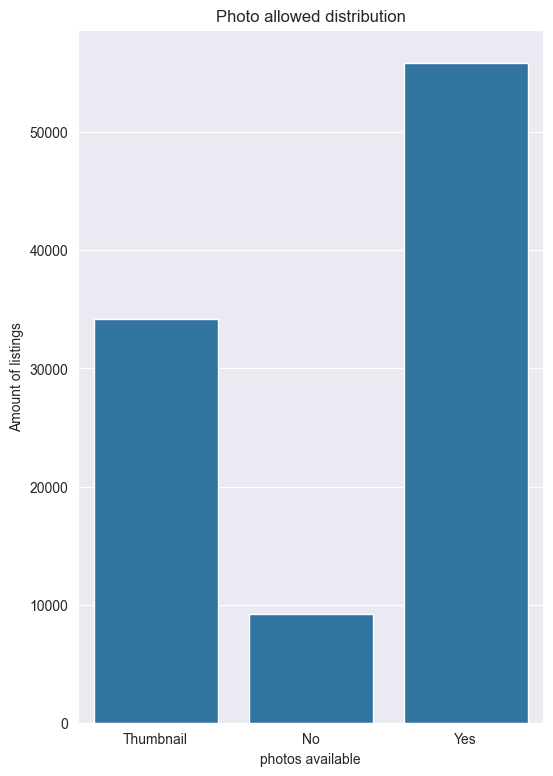

In [968]:
plt.figure(figsize=(6,9))
sns.countplot(data, x='has_photo')
plt.xlabel("photos available")
plt.ylabel("Amount of listings")
plt.title("Photo allowed distribution")
plt.show()

Disse værdier tildelse følgende værdier:
- 'No' = 0
- 'Thumbnail' = 1
- 'Yes' = 2

In [969]:
data['has_photo'] = data['has_photo'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Thumbnail' else 2)
data

,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,Clubhouse,...,Doorman,Luxury,Elevator,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1,1,2195.0,542,Redondo Beach,CA
1,1.5,0,0,0,0,0,0,0,0,0,...,0,0,0,3.0,1,1,1250.0,1500,Newport News,VA
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,3.0,1,0,1395.0,1650,Raleigh,NC
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,1,1,1600.0,820,Vacaville,CA
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1,1,975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,1,1,0,0,0,0,...,0,0,0,1.0,2,0,780.0,605,Houston,TX
99488,2.0,0,1,1,1,1,0,1,0,1,...,0,0,0,2.0,2,1,813.0,921,Jacksonville,FL
99489,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1.0,2,1,1325.0,650,San Diego,CA
99490,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1.0,2,1,931.0,701,Huntersville,NC


In [970]:
data['has_photo'].unique()

array([1, 0, 2])

### "cityname" value 

In [971]:
len(data['cityname'].unique())

2976

In [972]:
len(data.loc[data['cityname'].isnull()])

298

først vil jeg fjerne alle rækker, som ikke har et bynavn

In [973]:
data.loc[data['cityname'].isnull(), 'cityname'] = "No cityname"
data.drop(data[data['cityname'] == 'No cityname'].index, inplace=True)

Jeg vil erstatte alle byer der opstår 10 gange eller færre med other

In [974]:
min_mumber_of_occurences = 50

In [975]:
cities_few_instances = data.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)
len(cities_few_instances[cities_few_instances<min_mumber_of_occurences])

2589

In [976]:
cities_few_instances=cities_few_instances[cities_few_instances<min_mumber_of_occurences]
data.cityname = data.cityname.apply(lambda x: 'Other' if x in cities_few_instances else x)

In [977]:
data.groupby('cityname')['cityname'].agg('count').sort_values(ascending=False)

cityname
Other          20891
Dallas          2854
Denver          2750
Los Angeles     2401
Las Vegas       1846
               ...  
Macon             50
Norcross          50
Des Moines        50
Conroe            50
Stoughton         50
Name: cityname, Length: 387, dtype: int64

By navnet erstattes med gennemsnit prisen for den by, på den måde har byen stadig en indflydelse på prisen, uden at jeg skal tilføje tusindvis af kolonner til datasættet

In [978]:
# Calculate average price per city and map it back to the dataset
city_avg_price = data.groupby('cityname')['price'].mean()
data['city_avg_price'] = data['cityname'].map(city_avg_price)
data

,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,Clubhouse,...,Luxury,Elevator,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,city_avg_price
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,1,1,2195.0,542,Redondo Beach,CA,2790.870130
1,1.5,0,0,0,0,0,0,0,0,0,...,0,0,3.0,1,1,1250.0,1500,Newport News,VA,1077.572727
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,3.0,1,0,1395.0,1650,Raleigh,NC,1243.326012
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,2.0,1,1,1600.0,820,Other,CA,1486.404863
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,1,1,975.0,624,Other,NM,1486.404863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,1,1,0,0,0,0,...,0,0,1.0,2,0,780.0,605,Houston,TX,1091.017591
99488,2.0,0,1,1,1,1,0,1,0,1,...,0,0,2.0,2,1,813.0,921,Jacksonville,FL,1152.475884
99489,1.0,0,1,0,0,0,0,0,0,0,...,0,0,1.0,2,1,1325.0,650,San Diego,CA,2376.473618
99490,1.0,0,0,0,0,1,0,0,0,0,...,0,0,1.0,2,1,931.0,701,Huntersville,NC,1354.746667


Herefter kan *cityname* fjernes

In [979]:
city_avg_price_square_feet = data[['cityname', 'square_feet', 'price']]
city_avg_price_square_feet.loc[:, 'price_per_sqft'] = city_avg_price_square_feet['price'] / city_avg_price_square_feet['square_feet']
city_avg_price_square_feet = city_avg_price_square_feet.groupby('cityname')['price_per_sqft'].mean().reset_index()
city_avg_price_square_feet = city_avg_price_square_feet.sort_values(by='price_per_sqft', ascending=False).reset_index().drop(columns='index')
city_avg_price_square_feet. head(10)

C:\Users\mmsor\AppData\Local\Temp\ipykernel_8108\1844780912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_avg_price_square_feet.loc[:, 'price_per_sqft'] = city_avg_price_square_feet['price'] / city_avg_price_square_feet['square_feet']


,cityname,price_per_sqft
0,San Francisco,5.902450
1,New York,4.877180
2,Redwood City,4.856942
3,Culver City,4.806134
4,Santa Monica,4.607079
5,West Hollywood,4.607037
6,Cambridge,4.174835
7,Marina Del Rey,3.779526
8,Oakland,3.734824
9,Redondo Beach,3.638827


In [980]:
city_avg_price_square_feet.tail(10)

,cityname,price_per_sqft
377,Minot,0.892465
378,Jonesboro,0.890501
379,West Fargo,0.864087
380,Shreveport,0.853486
381,Dayton,0.848935
382,Wichita,0.838613
383,Texarkana,0.828648
384,Lynchburg,0.823897
385,Clarkston,0.808357
386,Topeka,0.735468


### "state" value

In [981]:
len(data.loc[data['state'].isnull()])

0

Til kolonnen 'state' bruger jeg samme metode som til cityname. jeg starter med at fjerne alle rækker der ikke har en værdi i kolonnen.

In [982]:
data.loc[data['state'].isnull(), 'state'] = "No state"
data.drop(data[data['state'] == 'No state'].index, inplace=True)

In [983]:
# Calculate average price per state and map it back to the dataset
city_avg_price = data.groupby('state')['price'].mean()
data['state_avg_price'] = data['state'].map(city_avg_price)
data

,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,Clubhouse,...,Elevator,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,city_avg_price,state_avg_price
0,1.0,0,0,0,0,0,0,0,0,0,...,0,1.0,1,1,2195.0,542,Redondo Beach,CA,2790.870130,2465.646864
1,1.5,0,0,0,0,0,0,0,0,0,...,0,3.0,1,1,1250.0,1500,Newport News,VA,1077.572727,1485.990337
2,2.0,0,0,0,0,0,0,0,0,0,...,0,3.0,1,0,1395.0,1650,Raleigh,NC,1243.326012,1153.003970
3,1.0,0,0,0,0,0,0,0,0,0,...,0,2.0,1,1,1600.0,820,Other,CA,1486.404863,2465.646864
4,1.0,0,0,0,0,0,0,0,0,0,...,0,1.0,1,1,975.0,624,Other,NM,1486.404863,844.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,0,0,1,1,1,0,0,0,0,...,0,1.0,2,0,780.0,605,Houston,TX,1091.017591,1218.192362
99488,2.0,0,1,1,1,1,0,1,0,1,...,0,2.0,2,1,813.0,921,Jacksonville,FL,1152.475884,1574.700763
99489,1.0,0,1,0,0,0,0,0,0,0,...,0,1.0,2,1,1325.0,650,San Diego,CA,2376.473618,2465.646864
99490,1.0,0,0,0,0,1,0,0,0,0,...,0,1.0,2,1,931.0,701,Huntersville,NC,1354.746667,1153.003970


In [984]:
state_avg_price_square_feet = data[['state', 'square_feet', 'price']]
state_avg_price_square_feet.loc[:, 'price_per_sqft'] = state_avg_price_square_feet['price'] / state_avg_price_square_feet['square_feet']
state_avg_price_square_feet = state_avg_price_square_feet.groupby('state')['price_per_sqft'].mean().reset_index()
state_avg_price_square_feet = state_avg_price_square_feet.sort_values(by='price_per_sqft', ascending=False).reset_index().drop(columns='index')

state_avg_price_square_feet.head(10)

C:\Users\mmsor\AppData\Local\Temp\ipykernel_8108\4018738245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_avg_price_square_feet.loc[:, 'price_per_sqft'] = state_avg_price_square_feet['price'] / state_avg_price_square_feet['square_feet']


,state,price_per_sqft
0,DC,3.373305
1,NY,2.991710
2,CA,2.795405
3,HI,2.636039
4,RI,2.414641
5,MA,2.322498
6,NJ,2.261388
7,WA,2.091487
8,OR,1.874634
9,IL,1.811956


In [985]:
state_avg_price_square_feet.tail(10)

,state,price_per_sqft
41,KY,1.080460
42,NE,1.058432
43,KS,0.994386
44,SD,0.970952
45,ND,0.966610
46,AL,0.965194
47,AR,0.930630
48,MS,0.886189
49,WY,0.846221
50,WV,0.787550


# Outlier Detection

## Outlier detection med box plot

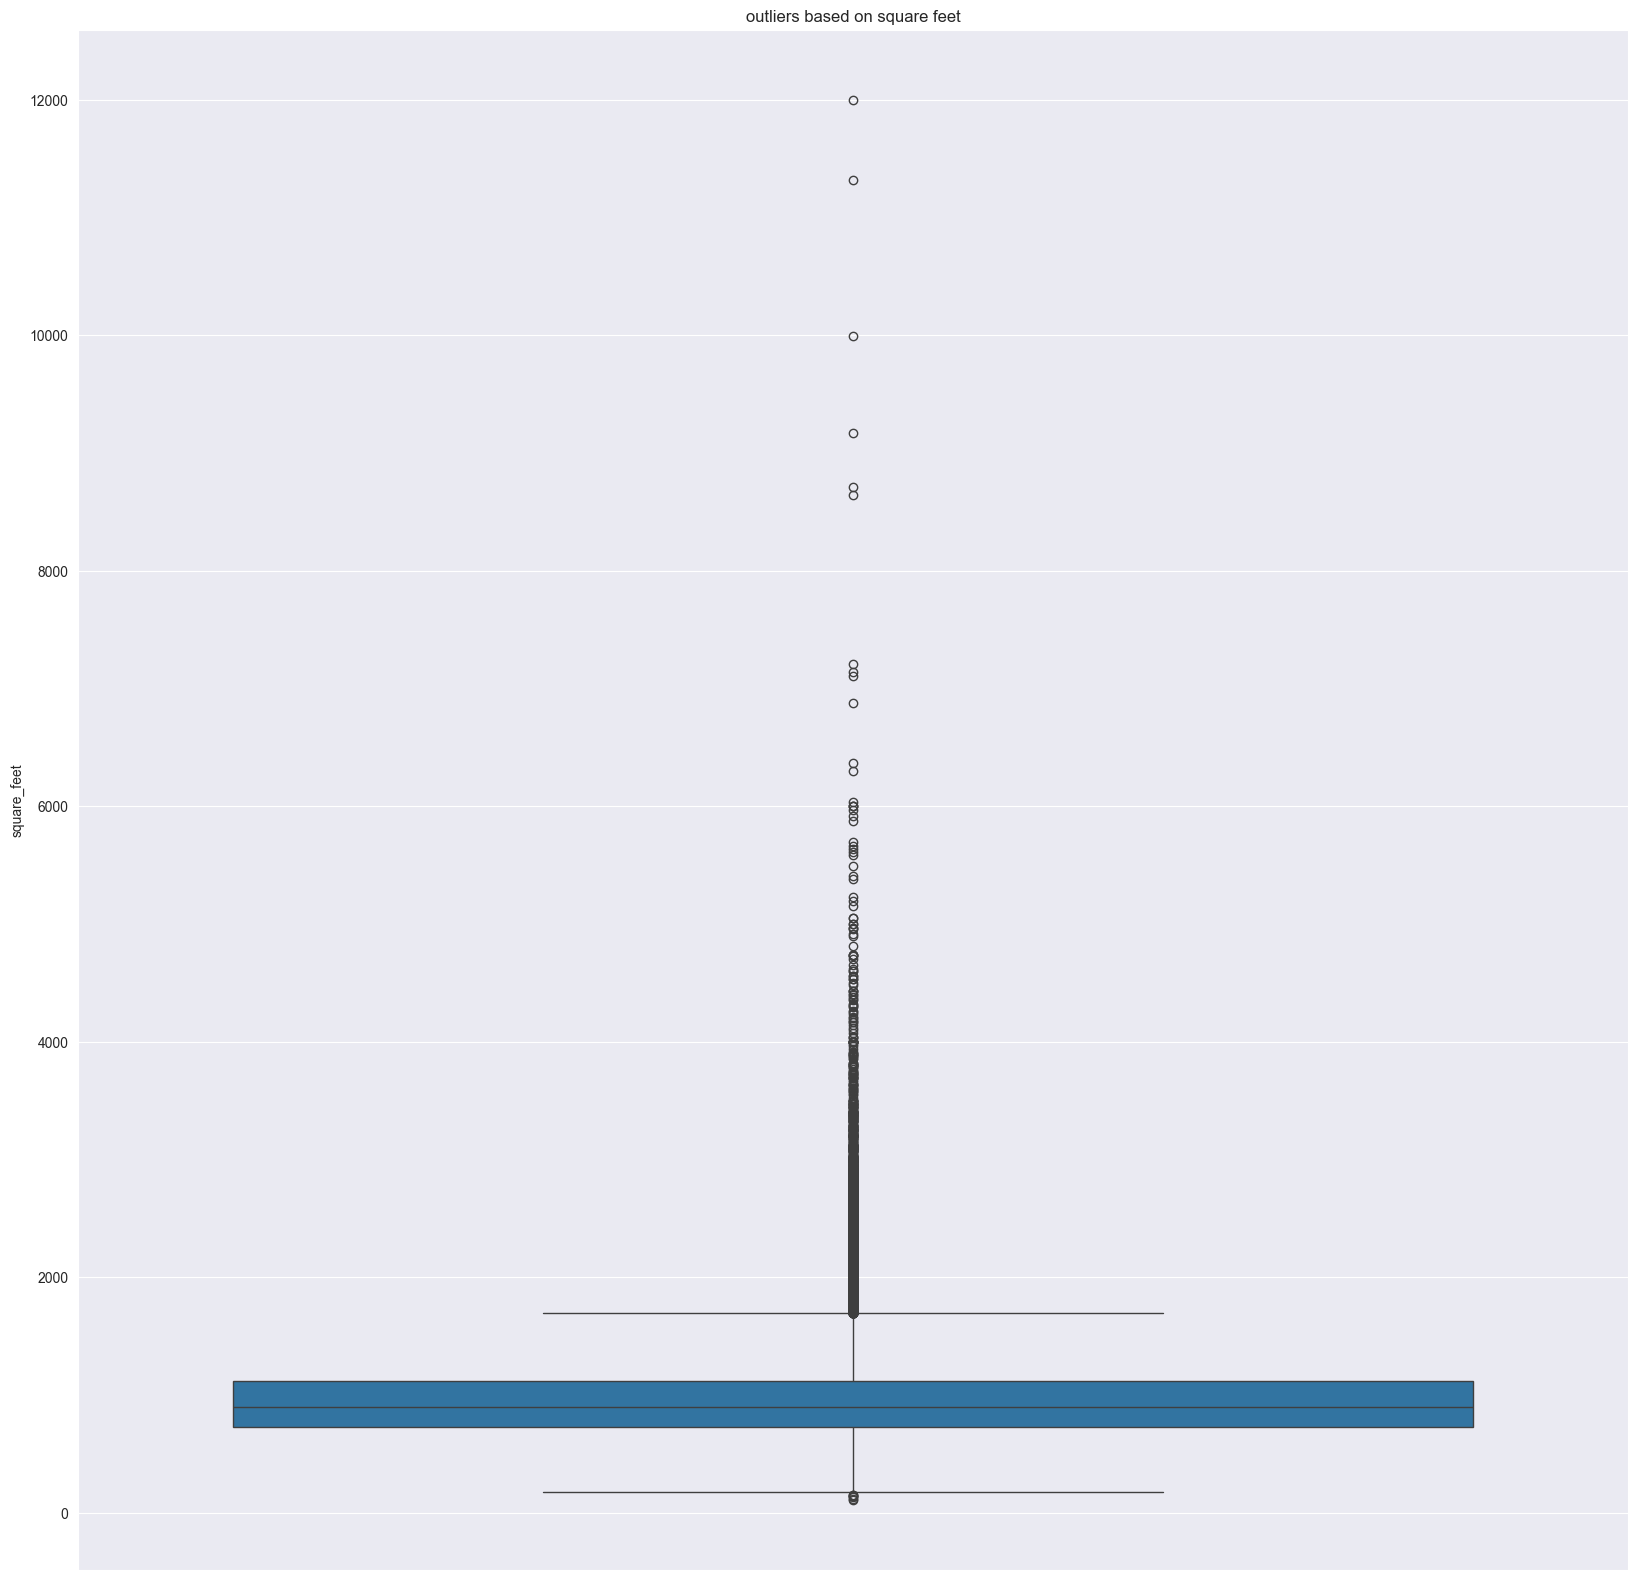

In [986]:
plt.figure(figsize=(20,20 ))
sns.boxplot(data['square_feet'])
plt.title("outliers based on square feet")
plt.show()

Outlier med IQR

In [987]:
Q1 = data['square_feet'].quantile(0.25)
Q3 = data['square_feet'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 3.5 * IQR
upper_bound = Q3 + 3.5 * IQR

# Number of outliers:
outliers = data[(data['square_feet'] < lower_bound) | (data['square_feet'] > upper_bound)]
print(f"Amount of outliers {outliers.shape[0]}")
print(f"Out of {data.shape[0]} datapoints")
print(f"upper bound: {upper_bound}, lower bound: {lower_bound}")

data_no_outliers = data[(data['square_feet'] >= lower_bound) & (data['square_feet'] <= upper_bound)]

Amount of outliers 720
Out of 98944 datapoints
upper bound: 2462.5, lower bound: -617.5


# EDA
EDA Goals:
- Understand Price Distribution:
	- Analyze rental prices to see the typical range and identify high-end vs. affordable listings.
- Explore Size and Price Relationship:
	- Examine how square footage relates to price, which helps understand price per square foot.
- Location Analysis:
	- Check price trends by location or city to identify areas with higher rental costs.
- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

In [988]:
data_no_string = data.drop(columns=['cityname','state'])

# Explore Size and Price Relationship
Som man kan se på Heatmap er *square_feet* det felt med størst indflydelse på prisen, med en positiv korrelation på 0.4

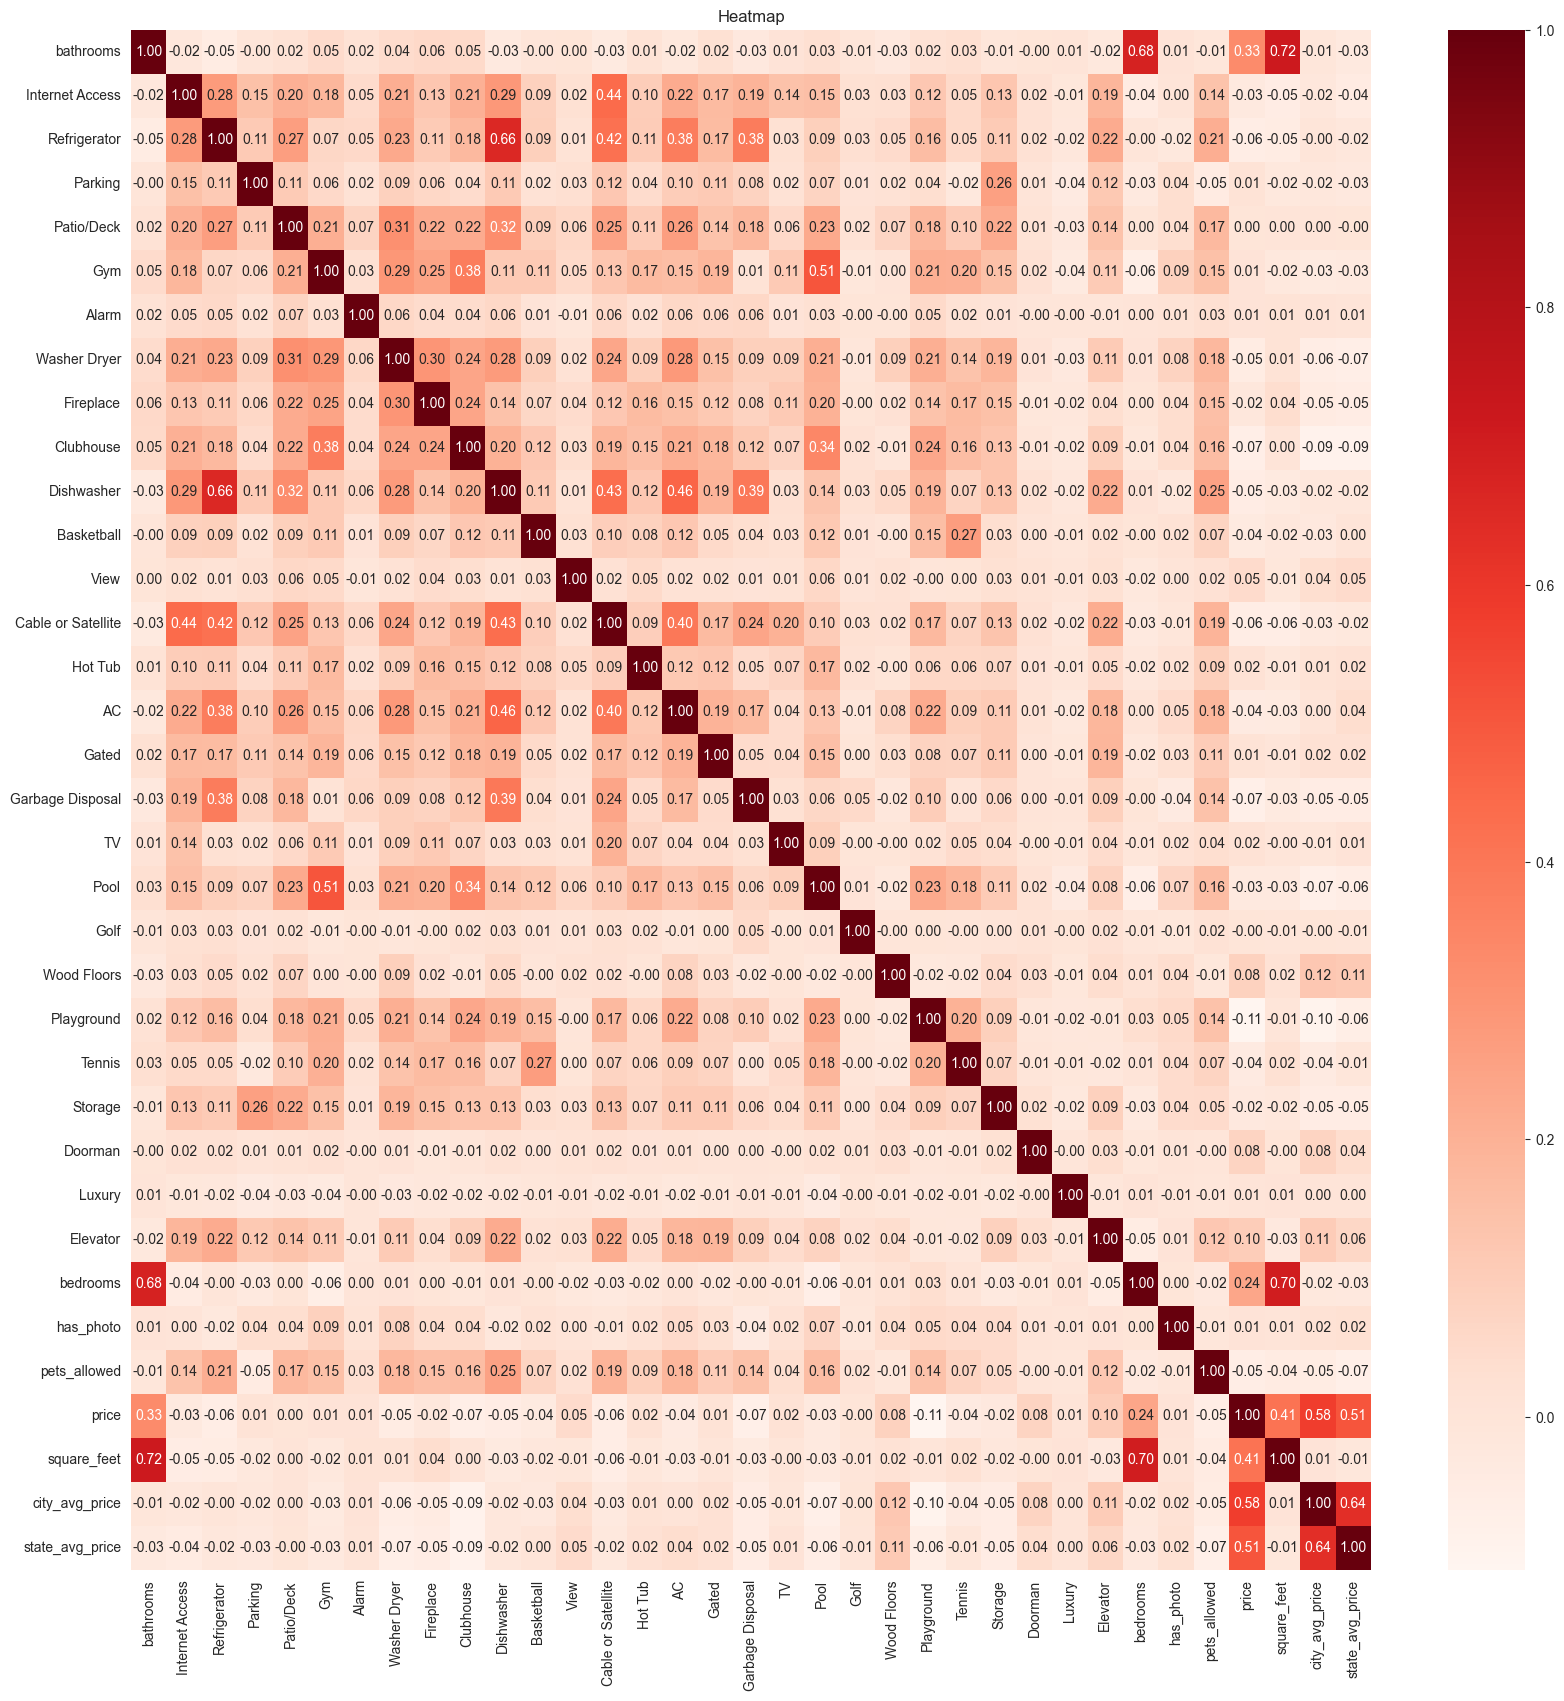

In [989]:
plt.figure(figsize=(20,20))
sns.heatmap(data_no_string.corr(),annot=True, cmap='Reds', fmt='.2f')
plt.title("Heatmap")
plt.show()

Text(0.5, 1.0, 'Square Feet to Price Ratio before outlier removal')

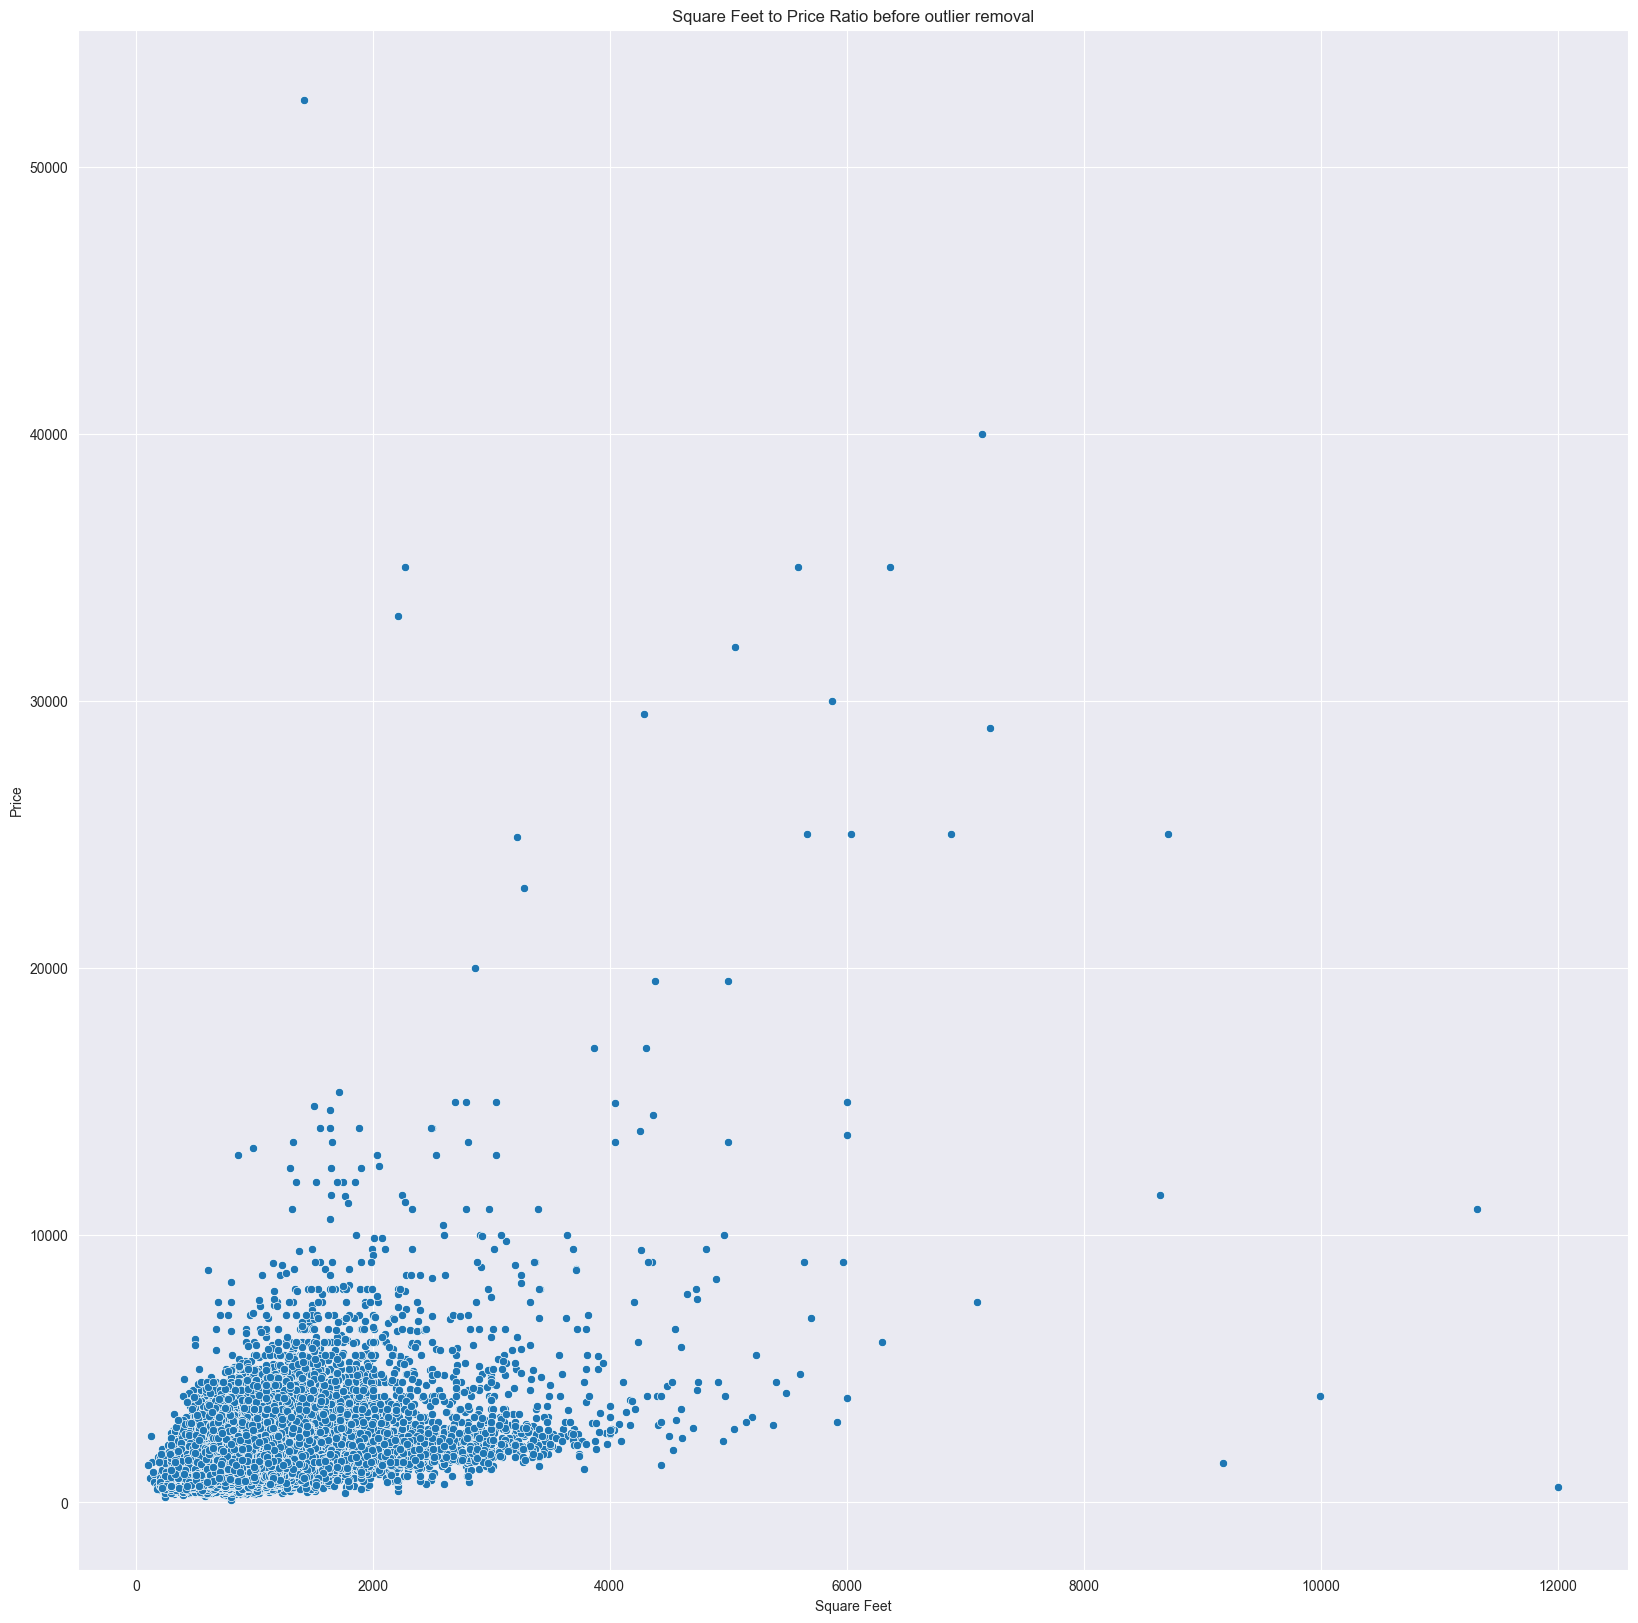

In [990]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=data, x="square_feet", y="price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet to Price Ratio before outlier removal")

Text(0.5, 1.0, 'Square Feet to Price Ratio after outlier removal')

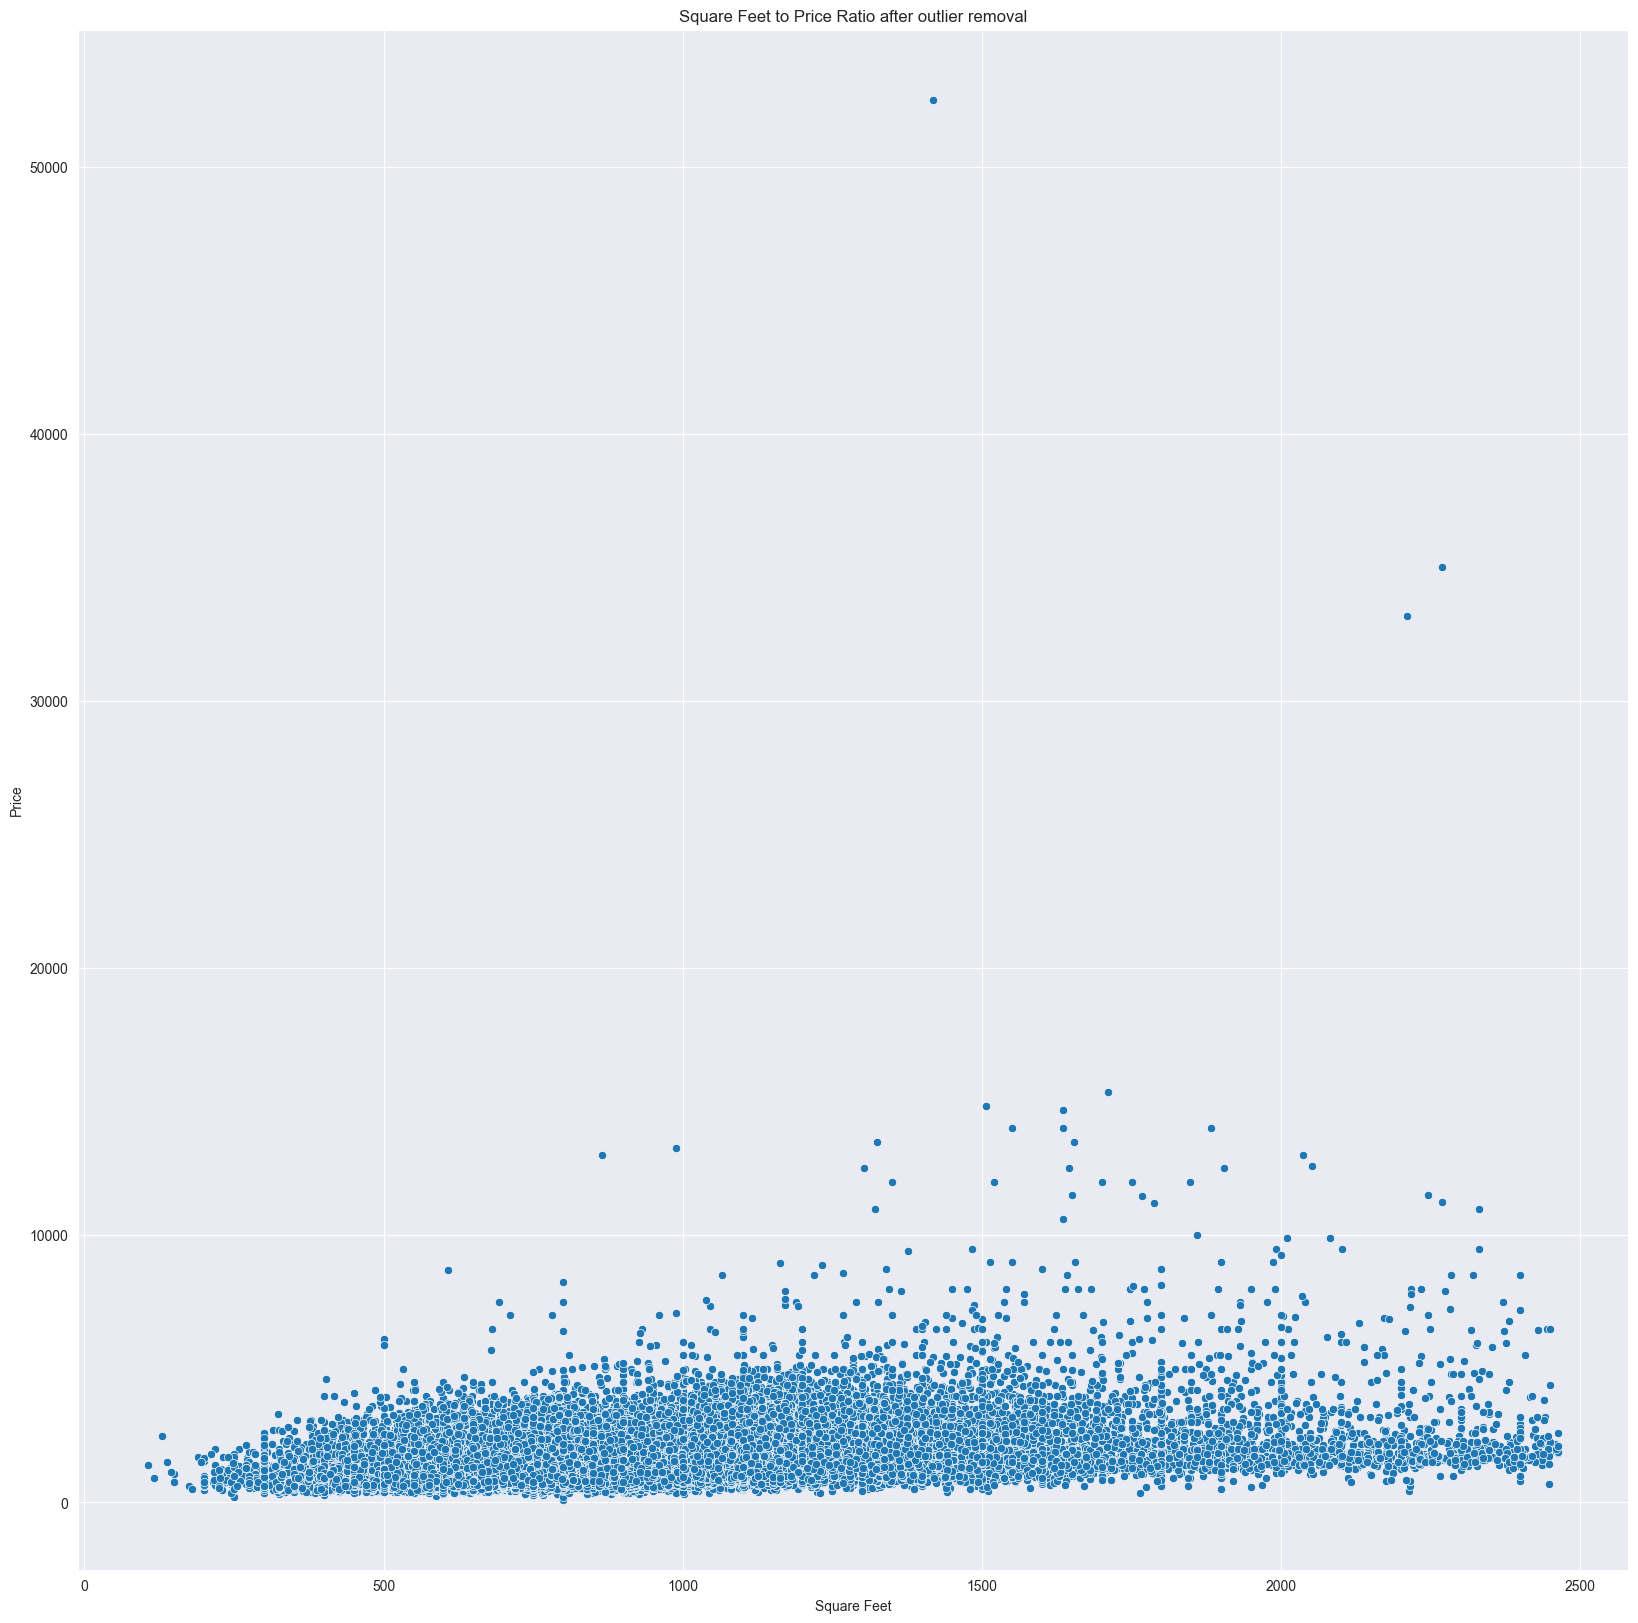

In [991]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=data_no_outliers, x="square_feet", y="price")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet to Price Ratio after outlier removal")

### Removing the outliers

In [992]:
data = data_no_outliers

- Amenity Impact:
	- Look at how features like balcony, parking, or pet-friendly affect rental prices.

Som man kan se på Heatmap er der så godt som ingen sammenhæng mellem de forskellige amenities og prisen, dem der er tættest på er Elevator om en positiv korrelation på 0.1 og Doorman og Wood Floors med en positiv korrelation på 0.08

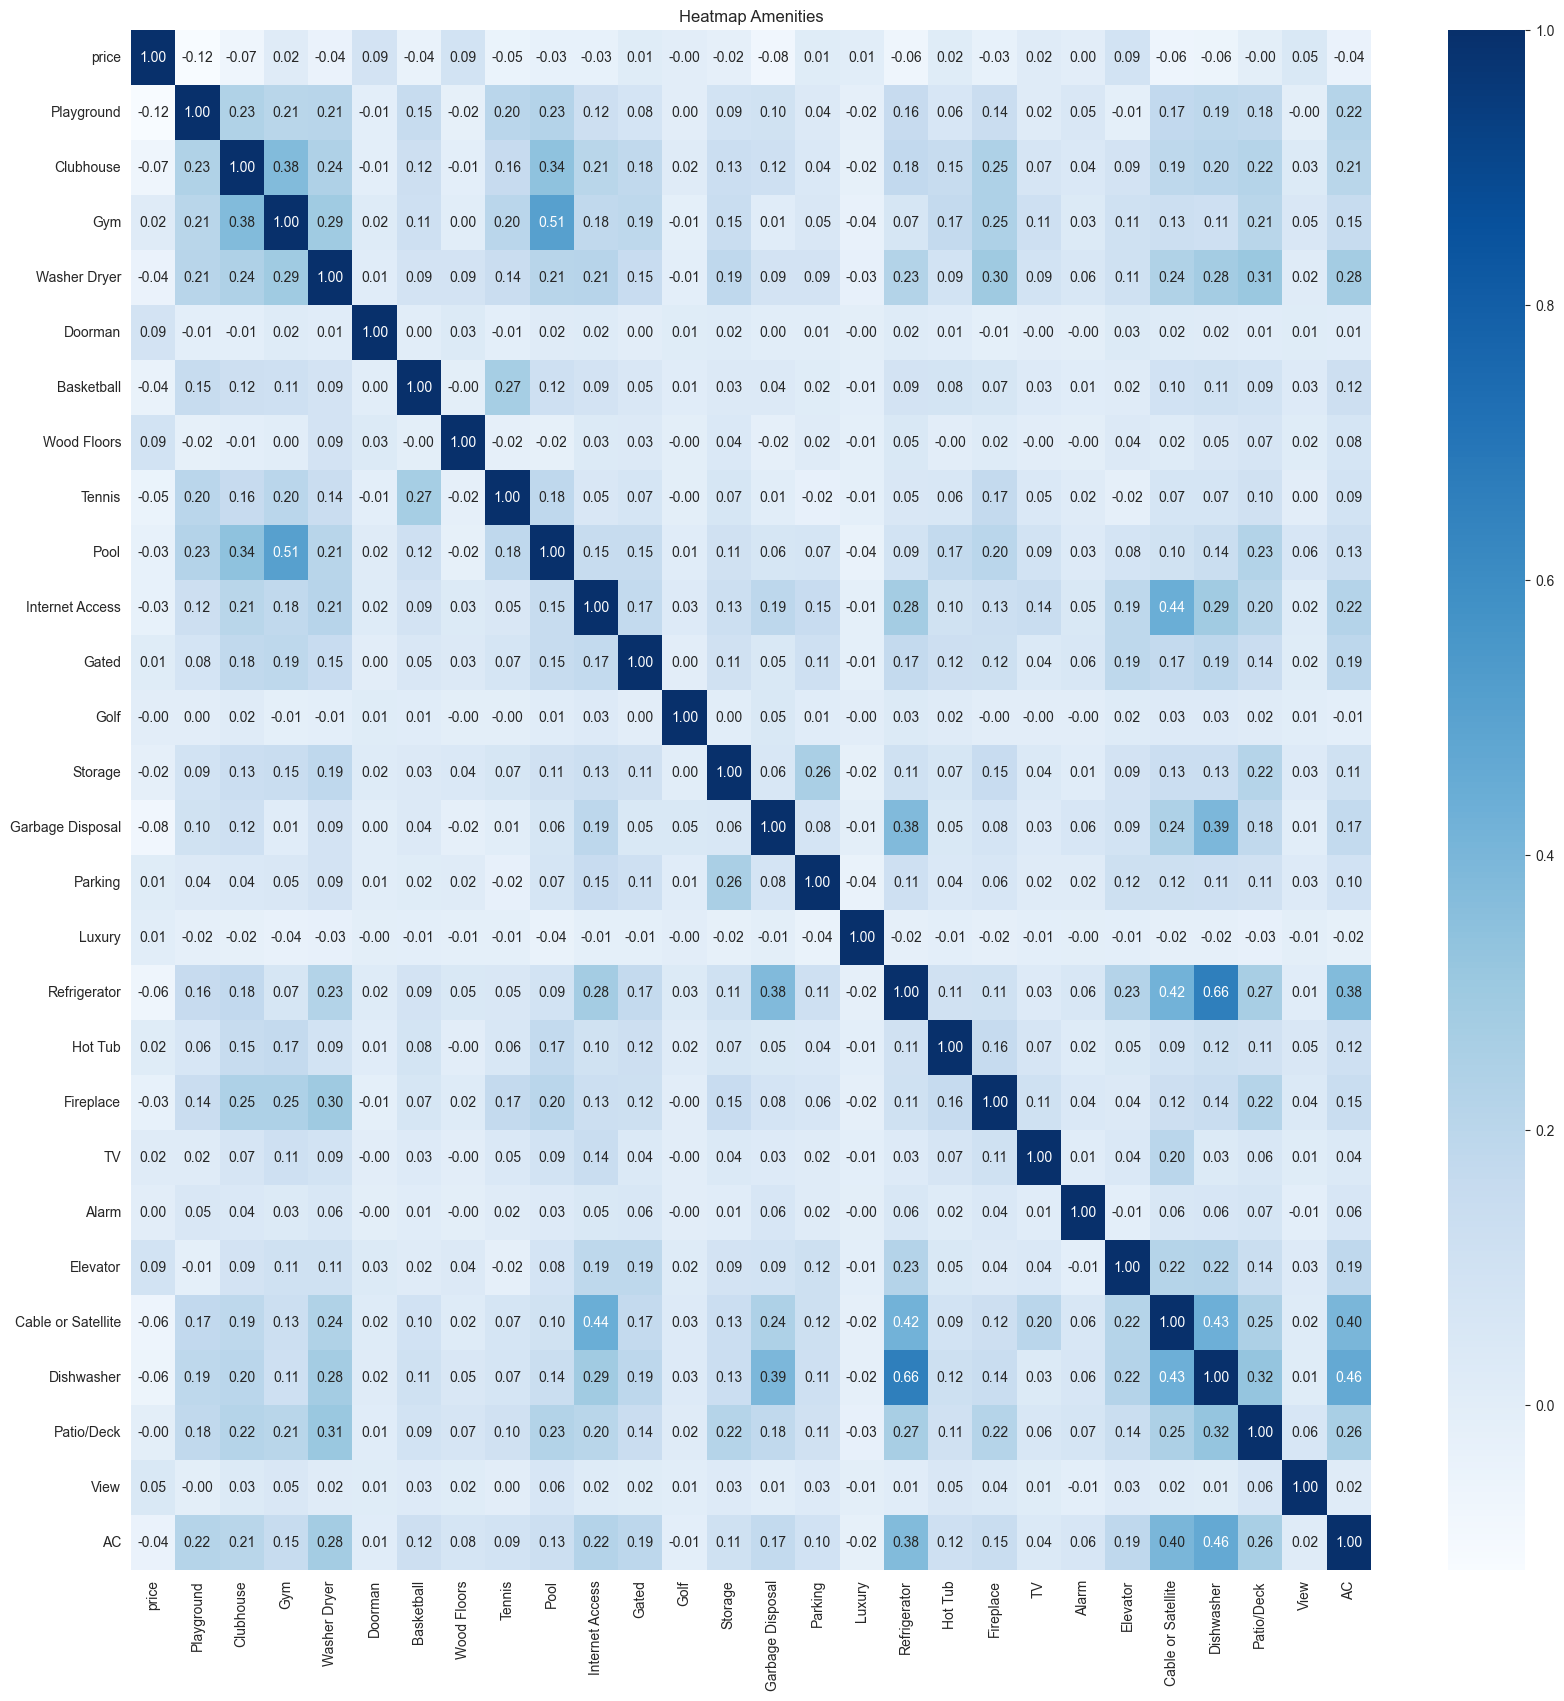

In [993]:
Amenities_Price_corr = data[['price','Playground', 'Clubhouse', 'Gym', 'Washer Dryer', 'Doorman',
       'Basketball', 'Wood Floors', 'Tennis', 'Pool', 'Internet Access',
       'Gated', 'Golf', 'Storage', 'Garbage Disposal', 'Parking', 'Luxury',
       'Refrigerator', 'Hot Tub', 'Fireplace', 'TV', 'Alarm', 'Elevator',
       'Cable or Satellite', 'Dishwasher', 'Patio/Deck', 'View', 'AC']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(Amenities_Price_corr,annot=True, cmap='Blues', fmt='.2f')
plt.title("Heatmap Amenities")
plt.show()

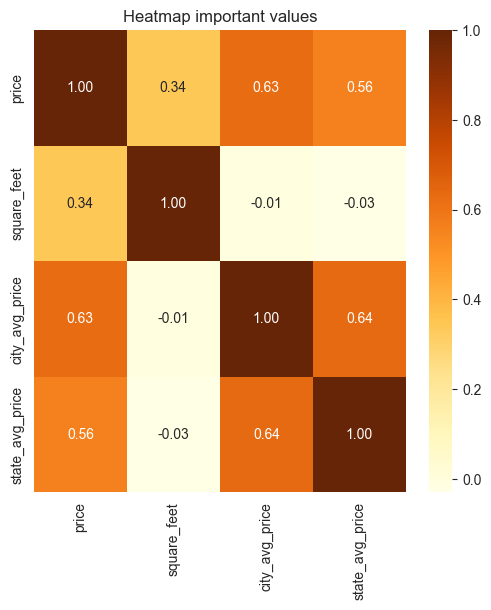

In [994]:
important_attributes = data[['price','square_feet','city_avg_price','state_avg_price']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(important_attributes,annot=True, cmap='YlOrBr', fmt='.2f')
plt.title("Heatmap important values")
plt.show()

# ML Goals
- Predict Rental Price:
	- Build a regression model to predict price based on features like location, size, and amenities.
- Classify Apartments by Price Range:
	- Use classification to group apartments into price tiers (e.g., budget, mid-range, luxury).
- Identify Key Price Drivers:
	- Use feature importance to find the most influential factors affecting rental prices.



 # Predict Rental Price:
	- Build a regression model to predict price based on features like location, size, and amenities.

In [995]:
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']

In [996]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98944 entries, 0 to 99491
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           98944 non-null  float64
 1   Internet Access     98944 non-null  int64  
 2   Refrigerator        98944 non-null  int64  
 3   Parking             98944 non-null  int64  
 4   Patio/Deck          98944 non-null  int64  
 5   Gym                 98944 non-null  int64  
 6   Alarm               98944 non-null  int64  
 7   Washer Dryer        98944 non-null  int64  
 8   Fireplace           98944 non-null  int64  
 9   Clubhouse           98944 non-null  int64  
 10  Dishwasher          98944 non-null  int64  
 11  Basketball          98944 non-null  int64  
 12  View                98944 non-null  int64  
 13  Cable or Satellite  98944 non-null  int64  
 14  Hot Tub             98944 non-null  int64  
 15  AC                  98944 non-null  int64  
 16  Gated    

### Linear Regression

In [997]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

In [998]:
X_train

,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,Clubhouse,...,Storage,Doorman,Luxury,Elevator,bedrooms,has_photo,pets_allowed,square_feet,city_avg_price,state_avg_price
97720,1.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3.0,2,0,1228,1486.404863,1198.060649
22448,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,2,1,1300,2666.037313,1644.813145
65395,2.0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,2.0,0,0,1094,1781.623632,1485.990337
26222,1.0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1.0,2,0,680,1204.832669,1351.633474
63790,1.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,0,1,1150,1077.572727,1485.990337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75402,2.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,3.0,1,0,1372,888.194539,1120.110737
36637,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1.0,2,0,784,1189.562657,1110.922481
40339,2.0,1,1,1,1,1,0,1,0,1,...,1,0,0,0,2.0,2,1,1096,1337.044849,1218.192362
19842,1.0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1.0,1,0,659,2032.253333,2192.835058


In [999]:
X_test

,bathrooms,Internet Access,Refrigerator,Parking,Patio/Deck,Gym,Alarm,Washer Dryer,Fireplace,Clubhouse,...,Storage,Doorman,Luxury,Elevator,bedrooms,has_photo,pets_allowed,square_feet,city_avg_price,state_avg_price
31500,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1.0,2,1,842,1486.404863,1644.813145
70205,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,1,1,400,2999.112453,2465.646864
95558,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1.0,2,0,375,1687.072785,1485.228682
82112,2.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2.0,2,0,1111,2376.473618,2465.646864
54262,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.0,1,1,810,1267.366667,2465.646864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2.0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,2.0,2,0,1116,1380.815287,1153.003970
42765,2.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,4.0,2,0,1607,1486.404863,2192.835058
21386,2.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2.0,1,0,1251,1133.026002,1173.551920
86276,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.0,2,0,1000,2920.430000,2531.576271


In [1000]:
# Train Linear Regression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluate linear Regression
print('R2 Score')
print(r2_score(y_test,y_pred))

R2 Score
0.4965604077137401


In [1001]:
results_df = pd.DataFrame({
    'Actual Value':y_test,
    'Predicted Value': y_pred
})
print(results_df)

       Actual Value  Predicted Value
31500        1574.0      1465.698236
70205        1295.0      2584.359948
95558        1125.0      1070.119739
82112        3570.0      2831.114689
54262        1266.0      1465.897905
...             ...              ...
10799        1805.0      1720.558988
42765        4900.0      2255.762342
21386        1449.0      1503.905975
86276        2400.0      2980.938128
21929        1421.0      1365.164374

[19789 rows x 2 columns]


In [1002]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 324.5813263056105
Mean Squared Error: 488117.16858350456
Root Mean Squared Error: 698.6538259993317
R² Score: 49.66%


Jeg vil forsøge at begrænse dimensionalitet af dataen, ved kun at fokuserer på de 10 vigtigste features.
Da jeg forsøger med LinearRegression modellen kan jeg ikke her benytte feature_importances_, istedet kan jeg benytte coef_ for at bestemme attributternes vigtighed, for at gøre dette skal jeg bruge Standardization

In [1003]:
scaler = StandardScaler()
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=12, test_size=0.2)

# Scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the model and extractiong data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Identify top 10 features
coefficients = model.coef_
feature_names = X_train.columns

top_10_indices = np.argsort(np.abs(coefficients))[-10:][::-1]
top_10_features = feature_names[top_10_indices]

# Get top feastures from original data
X_train_top_10 = X_train_scaled[:, top_10_indices]
X_test_top_10 = X_test_scaled[:, top_10_indices]

# Train new model with only top 10 features 
model_top_10 = LinearRegression()
model_top_10.fit(X_train_top_10, y_train)

# Predictions made by new model
predictions_top_10 = model_top_10.predict(X_test_top_10)


In [1004]:
top_10_features

Index(['city_avg_price', 'square_feet', 'state_avg_price', 'bathrooms',
       'bedrooms', 'Elevator', 'Playground', 'Gym', 'AC', 'Doorman'],
      dtype='object')

In [1005]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions_top_10)
mse = mean_squared_error(y_test, predictions_top_10)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_top_10)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 327.58468951633614
Mean Squared Error: 491524.8184376749
Root Mean Squared Error: 701.0883100135637
R² Score: 49.30%


In [1006]:
# Evaluate R² on the training set
r2_train = model_top_10.score(X_train_top_10, y_train)
print("R² on training set:", r2_train)

# Evaluate R² on the test set
r2_test = model_top_10.score(X_test_top_10, y_test)
print("R² on test set:", r2_test)

R² on training set: 0.5742166133743813
R² on test set: 0.49304578875818017


In [1007]:
data_comparison = {'Actual values': y_test,
                   'predictions': predictions_top_10}
compare_df = pd.DataFrame(data_comparison)
compare_df

,Actual values,predictions
31500,1574.0,1436.614658
70205,1295.0,2592.914213
95558,1125.0,1054.728015
82112,3570.0,2816.820751
54262,1266.0,1548.599908
...,...,...
10799,1805.0,1695.816447
42765,4900.0,2291.846509
21386,1449.0,1453.858443
86276,2400.0,3005.191532


### RandomForestRegressor

In [1008]:
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [1009]:
model = RandomForestRegressor(n_estimators=500)

model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

In [1010]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 199.40915170675163
Mean Squared Error: 238399.76717115904
Root Mean Squared Error: 488.26198620326676
R² Score: 70.70%


In [1011]:
data_comparison = {'Actual values': y_test,
                   'predictions': rf_pred}
compare_df = pd.DataFrame(data_comparison)
compare_df

,Actual values,predictions
36963,1326.0,1374.563678
55536,870.0,820.733667
37592,1109.0,1123.903567
4731,830.0,816.597000
83870,900.0,1236.116000
...,...,...
34661,1585.0,1593.179190
38582,1426.0,1558.069952
47483,3561.0,3036.056000
29422,1100.0,1184.652000


#### RandomForrestRegressor Big 

In [1012]:
X = data_no_string.drop(columns=['price'])
y = data_no_string['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [1013]:
model = RandomForestRegressor(n_estimators=2000)

model.fit(X_train, y_train)

rf_pred = model.predict(X_test)

In [1014]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 190.40634323998157
Mean Squared Error: 158460.85068503662
Root Mean Squared Error: 398.0714140515953
R² Score: 76.94%


In [1015]:
data_comparison = {'Actual values': y_test,
                   'predictions': rf_pred}
compare_df = pd.DataFrame(data_comparison)
compare_df

,Actual values,predictions
46617,2090.0,1976.078208
85788,1099.0,1115.023921
623,1320.0,1586.185352
58746,2020.0,2387.528417
13861,1511.0,1493.428821
...,...,...
75516,1473.0,1435.613448
49220,1372.0,1415.385402
85727,1130.0,1130.086333
58162,2625.0,2360.720700


#### RandomForrestRegressor top 10

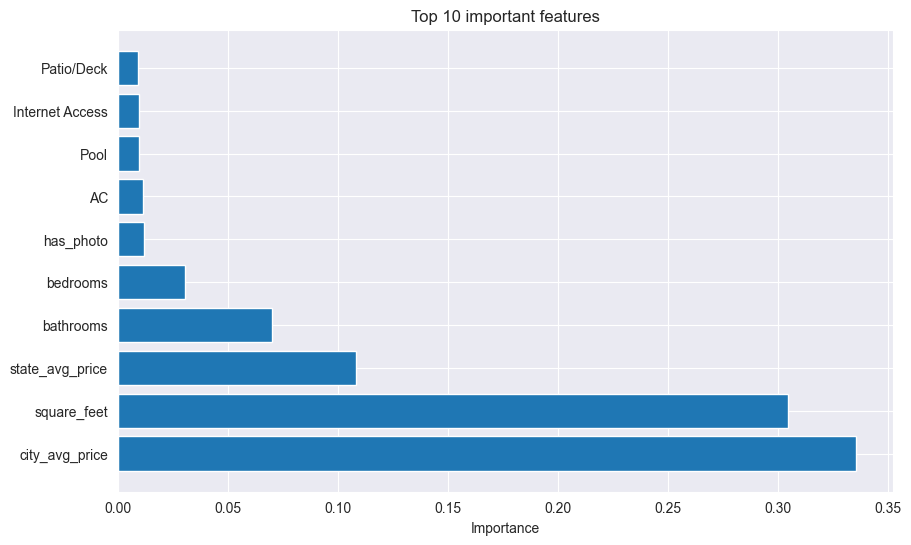

In [1016]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

top_10_features = X_train.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10,6))
plt.barh(top_10_features, top_importances)
plt.xlabel("Importance")
plt.title("Top 10 important features")
plt.show()


In [1017]:
X_train_top_10 = X_train[top_10_features]
X_test_top_10 = X_test[top_10_features]

X_test_top_10

,city_avg_price,square_feet,state_avg_price,bathrooms,bedrooms,has_photo,AC,Pool,Internet Access,Patio/Deck
46617,1337.044849,1197,1218.192362,1.0,1.0,2,0,1,0,0
85788,1195.728571,946,1218.192362,2.0,2.0,2,0,1,0,1
623,1486.404863,1099,1485.990337,2.0,2.0,1,0,1,0,1
58746,2386.468750,1049,2192.835058,2.0,2.0,1,0,1,0,1
13861,1617.806182,980,1554.973881,1.5,2.0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
75516,1600.339309,902,1351.633474,1.0,1.0,2,0,0,0,0
49220,1617.806182,1000,1554.973881,2.0,2.0,2,0,0,0,0
85727,1038.087379,1030,1218.192362,2.0,2.0,2,1,1,0,0
58162,1600.339309,1270,1351.633474,2.0,2.0,1,0,0,0,0


In [1018]:
model.fit(X_train_top_10, y_train)

predictions_top_10 = model.predict(X_test_top_10)

In [1019]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, predictions_top_10)
mse = mean_squared_error(y_test, predictions_top_10)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_top_10)

# Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2 * 100:.2f}%")

Mean Absolute Error: 202.92637311154039
Mean Squared Error: 175030.68631119665
Root Mean Squared Error: 418.3666888163978
R² Score: 74.52%


In [1020]:
data_comparison = {'Actual values': y_test,
                   'predictions': predictions_top_10}
compare_df = pd.DataFrame(data_comparison)
compare_df

,Actual values,predictions
46617,2090.0,1988.761388
85788,1099.0,1118.595185
623,1320.0,1360.824479
58746,2020.0,2381.008862
13861,1511.0,1525.178154
...,...,...
75516,1473.0,1350.350833
49220,1372.0,1441.423195
85727,1130.0,1129.998000
58162,2625.0,2335.416125


# Classify Apartments by Price Range:
- Low: 0 to 33rd percentile
- Medium: 34th to 66th percentile
- High: 67th percentile and above



In [1021]:
# Create price range as categories
data_no_string['price_category'] = pd.qcut(data_no_string['price'], q=3, labels=['Low', 'Medium', 'High'])

X_classification = data_no_string.drop(columns=['price', 'price_category'])
y_classification = data_no_string['price_category']

In [1022]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2)

classifier = RandomForestClassifier(n_estimators=500)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.86      0.86      6612
         Low       0.86      0.86      0.86      6633
      Medium       0.75      0.75      0.75      6544

    accuracy                           0.82     19789
   macro avg       0.82      0.82      0.82     19789
weighted avg       0.82      0.82      0.82     19789

Accuracy: 0.8232856637525898


In [1023]:
# Feature importance
feature_importances = pd.Series(classifier.feature_importances_, index=X_classification.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top Features:\n", top_features)

Top Features:
 city_avg_price     0.231276
square_feet        0.212817
state_avg_price    0.208404
bathrooms          0.037406
bedrooms           0.031052
has_photo          0.029736
pets_allowed       0.019272
Parking            0.017438
Pool               0.016610
Storage            0.015722
dtype: float64
